<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/algo/tarea-gradiente-vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TAREA   
Una implementación mas eficiente de La regresión lineal ya sea uni o multivariable se puede hacer mefiante operaciones vectoriales con numpy.



Para la recgresion lineal univariable, solo tenemos una característica de entrada x₁ y su correspondiente variable objetivo $y_i$. Introduciremos otra característica x₀=1 para todos los ejemplos de entrenamiento, simplemente para facilitar los cálculos. Por lo tanto, el modelo de regresión lineal se puede formular de la siguiente manera:  
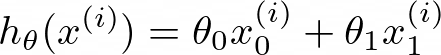


La regresión lineal utiliza el error cuadrático medio como función de coste, que se escribe de la siguiente manera pra $m$ ejemplos:



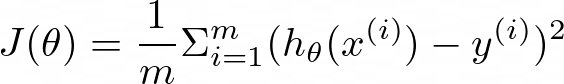

En cada iteración, calculamos el gradiente de J(θ) con respecto a todos los parámetros $\theta_0$ y $\theta1$.
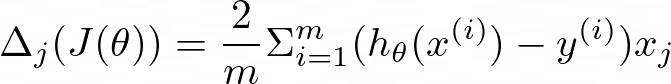

Los pasos anteriores se pueden realizar de una sola vez usando NumPy y la notación vectorizada de la siguiente manera:
Nota: Si tomamos $\theta$ como vector columna, entonces se escribe $θ^{T}X$

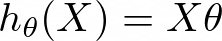

El vector de gradiente se calcula de la siguiente manera: DEMOSTRAR  
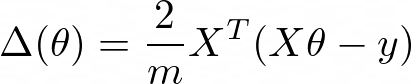

Finalmente actualizamos los parámetros del modo siguiente:  

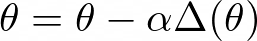

##TAREA: Implementar una solución vectorizada utilizando el gradiente descendente para regresión lineal univariable, que luego servirá tambiñen para el caso multivariable. Utilizar el sifuiente conjunto de datos. Comprobar con sklearn o ecuaciones normales

In [39]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

data1 = pd.read_csv('https://drive.google.com/uc?id=16jQHaXQNBNIe-wYZvA52stkBwOP6kQta', names=['Poblacion', 'Ingresos'])
print(data1.shape)

(97, 2)


In [40]:
data1.head()

,Poblacion,Ingresos
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Primero definamos nuestra funcion de coste

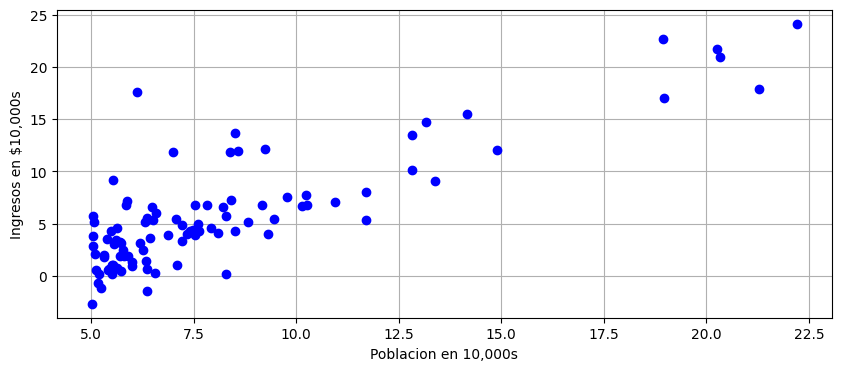

In [41]:
plt.figure(figsize=(10, 4))
plt.xlabel('Poblacion en 10,000s')
plt.ylabel('Ingresos en $10,000s')
plt.grid()
plt.plot(data1.Poblacion, data1.Ingresos, 'bo')

In [42]:
def prepareData(data, n):

    data.insert(0, 'Ones', 1)

    x = data.iloc[:, 0:n+1]
    y = data.iloc[:, n+1:n+2]

    x = np.matrix(x.values)
    y = np.matrix(y.values)
    theta = np.matrix(np.zeros((n+1, 1)))
    return x, y, theta

In [43]:
n = len(data1.columns)-1 # quitamos la columma objetivo (a predecir)
x, y, theta = prepareData(data1, n)
x.shape, y.shape, theta.shape

((97, 2), (97, 1), (2, 1))

In [44]:
def computeCost(X, y, theta):

    m = len(y)

    ## Calculate the cost with the given parameters
    cost = np.sum(np.square((x * theta) - y)) / (2 * m)
    return cost

In [45]:
#veamos el coste inicial ( theta = 0s)
computeCost(x, y, theta)

np.float64(32.072733877455676)

In [46]:
##Ecuación normal
betaHat = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print('coefficients: \n')
print(betaHat)

coefficients: 

[[-3.89578088]
 [ 1.19303364]]


In [54]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [50]:
x1 = x[:,1:2]
y1=y


In [51]:
# Revisemos las matrices.
x1.shape, y1.shape

((97, 1), (97, 1))

In [52]:
X_train, X_test, y_train, y_test = train_test_split( x1, y1, train_size = 0.7, test_size = 0.3, random_state = 0 )

In [ ]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(67, 1)
(30, 1)
(67,)
(30,)


In [76]:
model = LinearRegression()

In [77]:
model.fit(np.asarray(X_train),np.asarray(y_train))

LinearRegression()

In [78]:
print(model.intercept_)
print(model.coef_)

[-3.86246206]
[[1.19869775]]


In [79]:
predictions = model.predict(np.asarray(X_test))

In [82]:
# model evaluation
print(  'mean_squared_error : ', model.mean_squared_error(np.asarray(y_test), predictions))
print(  'mean_absolute_error : ',model.mean_absolute_error(np.asarray(y_test), predictions))

AttributeError: 'LinearRegression' object has no attribute 'mean_squared_error'

In [81]:
print('model intercept :', model.intercept_)
print('model coefficients : ', model.coef_)
print('Model score : ', model.score(np.asarray(x1), np.asarray(y)))

model intercept : [-3.86246206]
model coefficients :  [[1.19869775]]
Model score :  0.701805210510978


In [68]:
y_pred= lr.predict(np.asarray(X_train))

ValueError: Masked arrays must be 1-D

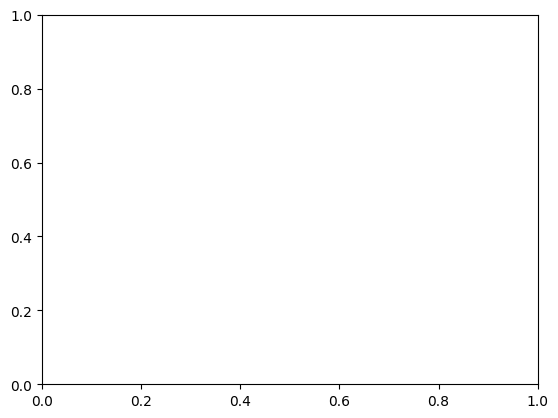

In [71]:
#dibujemos los datos y la recta
plt.scatter(X_train,y_train)
plt.plot(np.asarray(X_train),y_pred,color='red')
plt.show()

In [60]:
df=pd.DataFrame({'Actual':y1,'Pred':y_pred})
df.head()

ValueError: Per-column arrays must each be 1-dimensional

In [15]:
print("Mean Absolute Error", metrics.mean_absolute_error(y,y_pred))
print("Mean Square Error",metrics.mean_squared_error(y,y_pred))
print("Root Mean Square Error",np.sqrt(metrics.mean_squared_error(y,y_pred)))


Mean Absolute Error 2.208300750980133
Mean Square Error 8.960744360429102
Root Mean Square Error 2.9934502435198587
